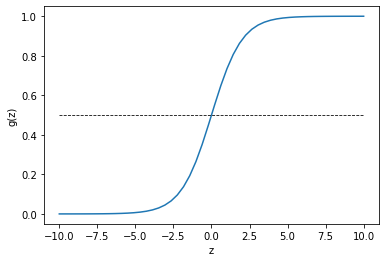

In [66]:
#Sigmoid函数 激活函数
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score#导入评分模块
import warnings
warnings.filterwarnings('ignore')  #忽视警告信息 
 
X = np.linspace(-10,10)   #在指定的间隔内返回均匀间隔的数字,生成等差数列
y = []
for i in X:
    y.append(1/(1+np.exp(-i)))   #列表末尾添加新的对象
plt.plot(X,y)
plt.plot(X,np.ones(len(X))/2,'--',c='black',linewidth='0.8')   #np.ones（）函数返回给定形状和数据类型的新数组，其中元素的值设置为1
plt.xlabel('z')
plt.ylabel('g(z)')
plt.show()

In [67]:
print(np.ones(len(X))/2)

[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]


In [68]:
# 乳腺癌数据上使用Logistic Regression
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
 
cancer = load_breast_cancer()   

X = cancer.data      
y = cancer.target    #1或0  阳性或阴性
print('data type: {0}; no.positive: {1}; no.negative: {2}'.format(X.shape, y[y==1].shape, y[y==0].shape))   #569个样本，30个特征  阳性：357  阴性：212
print(cancer.data[0])
print(cancer.feature_names) # 查看特征名称


data type: (569, 30); no.positive: (357,); no.negative: (212,)
[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


训练精度（C=0.001)：0.9530516431924883
测试精度（C=0.001)：0.9440559440559441
训练精度（C=1)：0.9577464788732394
测试精度（C=1)：0.958041958041958
训练精度（C=100)：0.9765258215962441
测试精度（C=100)：0.972027972027972


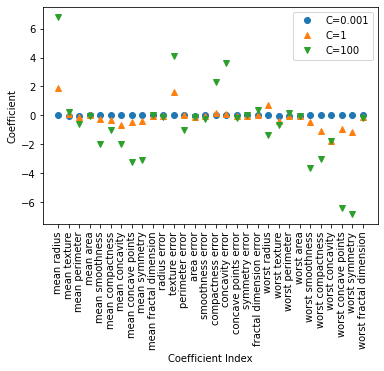

In [69]:
#stratify=cancer.target 表示分层，以样本标签进行分层   random_state：随机数种子
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,stratify = cancer.target,random_state=42)  
  
for C,maker in zip([0.001,1,100],['o','^','v']):  #三维图  ,manker：标记
    #LogisticRegression默认使用L2正则化，参数penalty可修改正则化方式
    logistic = LogisticRegression(C = C,penalty='l2',max_iter=1000).fit(X_train,y_train)
    print('训练精度（C={})：{}'.format(C,logistic.score(X_train,y_train)))
    print('测试精度（C={})：{}'.format(C,logistic.score(X_test,y_test)))
    plt.plot(logistic.coef_.T,maker,label = 'C={}'.format(C))   #C ：正则化强度 skleran中正则化项C越小，正则化程度越强，参数的变换范围越小  
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation = 90)  #显示x轴的刻标以及对应的标签
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient')
plt.legend()
plt.show()

训练精度（C=0.001)：0.9530516431924883
测试精度（C=0.001)：0.9440559440559441
训练精度（C=1)：0.9577464788732394
测试精度（C=1)：0.958041958041958
训练精度（C=100)：0.9812206572769953
测试精度（C=100)：0.972027972027972


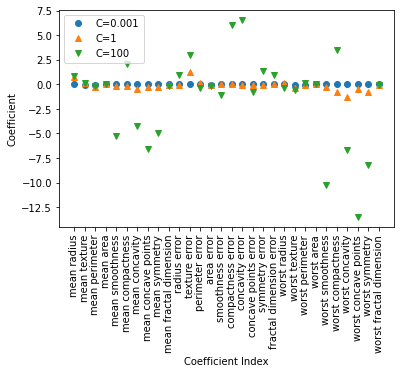

In [70]:
for C,maker in zip([0.001,1,100],['o','^','v']):  #三维图  ,manker：标记
    #LogisticRegression默认使用L2正则化，参数penalty可修改正则化方式
    logistic = LogisticRegression(C = C,penalty='l2',solver='newton-cg',max_iter=10000).fit(X_train,y_train)
    print('训练精度（C={})：{}'.format(C,logistic.score(X_train,y_train)))
    print('测试精度（C={})：{}'.format(C,logistic.score(X_test,y_test)))
    plt.plot(logistic.coef_.T,maker,label = 'C={}'.format(C))   #C ：正则化强度 skleran中正则化项C越小，正则化程度越强，参数的变换范围越小  
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation = 90)  #显示x轴的刻标以及对应的标签
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient')
plt.legend()
plt.show()

In [71]:
logistic=LogisticRegression(penalty='l2',C=10,solver='lbfgs',max_iter=1000)
logistic.fit(X_train,y_train)
print("Logistic训练模型评分："+str(accuracy_score(y_train,logistic.predict(X_train))))
print("Logistic待测模型评分："+str(accuracy_score(y_test,logistic.predict(X_test))))


Logistic训练模型评分：0.9671361502347418
Logistic待测模型评分：0.965034965034965


In [72]:
logistic=LogisticRegression(penalty='l2',C=10,solver='liblinear',max_iter=1000)
logistic.fit(X_train,y_train)
print("Logistic训练模型评分："+str(accuracy_score(y_train,logistic.predict(X_train))))
print("Logistic待测模型评分："+str(accuracy_score(y_test,logistic.predict(X_test))))

Logistic训练模型评分：0.9694835680751174
Logistic待测模型评分：0.965034965034965
